## Exploratory Data Analysis on Insurance dataset
### Importing necessary libraries and modules

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
os.chdir('..')
from scripts.utils import null,plot_data
warnings.filterwarnings('ignore',category=pd.errors.DtypeWarning)

### Loading the dataset

In [2]:
df=pd.read_csv('data/MachineLearningRating_v3.txt',sep='|')
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Examining important information about the data

In [3]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
df[['TotalClaims','TotalPremium']].describe()

,TotalClaims,TotalPremium
count,1.000098e+06,1.000098e+06
mean,6.486119e+01,6.190550e+01
std,2.384075e+03,2.302845e+02
min,-1.200241e+04,-7.825768e+02
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.178333e+00
75%,0.000000e+00,2.192982e+01
max,3.930921e+05,6.528260e+04


- Using the above  .describe data about the `TotalClaims` and the `TotalPremium` columns, There are some things we can say about the variability of the Claim and Premium of the dataset.
    1. In the `TotalClaims` column, all quartiles are at 0, suggesting that the column is mainly populated with 0 values. This observation suggests that a significant portion of individuals do not file claims, a positive trend that should be acknowledged and valued.
    2. There seem to be extremely rare cases where the `TotalClaims` value is negative in the dataset. This can be due to many cases but the probable causes can be:
        * Data Entry Error
        * Overpayment- Our company may have overpaid the claim and plans to correct the error.
        * Fraud- When the policyholder falsely claims a loss, Our company may have reversed the payout, leading in a negative claim value
    3. There seem to be a very high standard deviation value for the `TotalClaims` column. This may happen because the non-zero values of the column have high diversity and variation. 
    4. For the `TotalPremium` column, There is also a predominant value of 0 values but not as much as the `TotalClaims` column. This is obviously because as an insurance company, policyholders pay more than we pay them. 
    5. There are also certain negative values in this columns. Possible reasons can be:
        * Underwriting- The policyholder may represent a higher risk profile than we anticipated. This could lead us to re-evaluate the pricing of the user. 
        * Profitability- A negative premium value may indicate that the company is giving out more in claims than gaining in premium for that particular user. This would negatively impact our company so we need to pay special attention to this users. 

### Data Quality Assessment
-Checking for missing values

In [3]:
null_values=null(df)
null_values

,column_name,null_count,null_count(%)
38,NumberOfVehiclesInFleet,1000098,100.00
37,CrossBorder,999400,99.93
29,CustomValueEstimate,779642,77.96
35,Rebuilt,641901,64.18
36,Converted,641901,64.18
34,WrittenOff,641901,64.18
33,NewVehicle,153295,15.33
8,Bank,145961,14.59
9,AccountType,40232,4.02
11,Gender,9536,0.95


In [7]:
#Counting how many columns in the dataset have no null values 
null_values[null_values['null_count']==0].count()

column_name      30
null_count       30
null_count(%)    30
dtype: int64

* 30 out of the 52 columns(~58%) have no null values. But there are also some columns where more than 75% of the entry are null. Since we don't have to use most of these columns for our exploratory analysis or future prediction, we just leave them as they are.

### Plotting the graph of some important features in the dataset

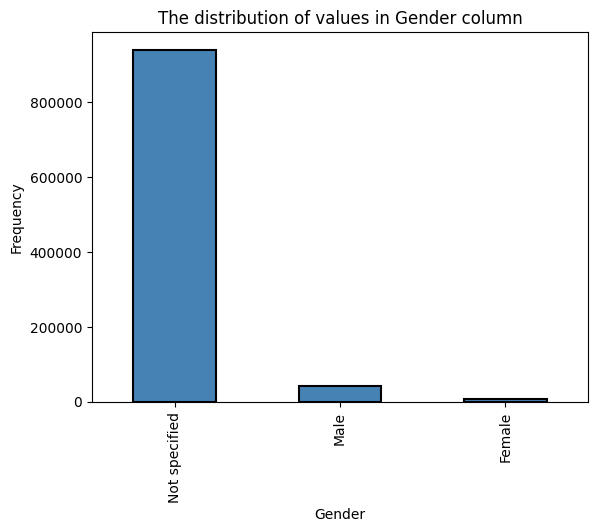

In [10]:
plot_data(df,column='Gender')

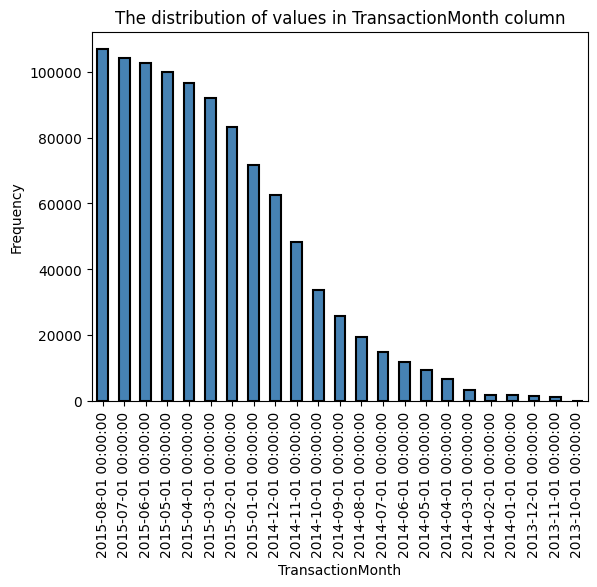

In [16]:
plot_data(df,column='TransactionMonth')

* We can see from the above plot that the transaction of our insurance company is increasing with respect to time.

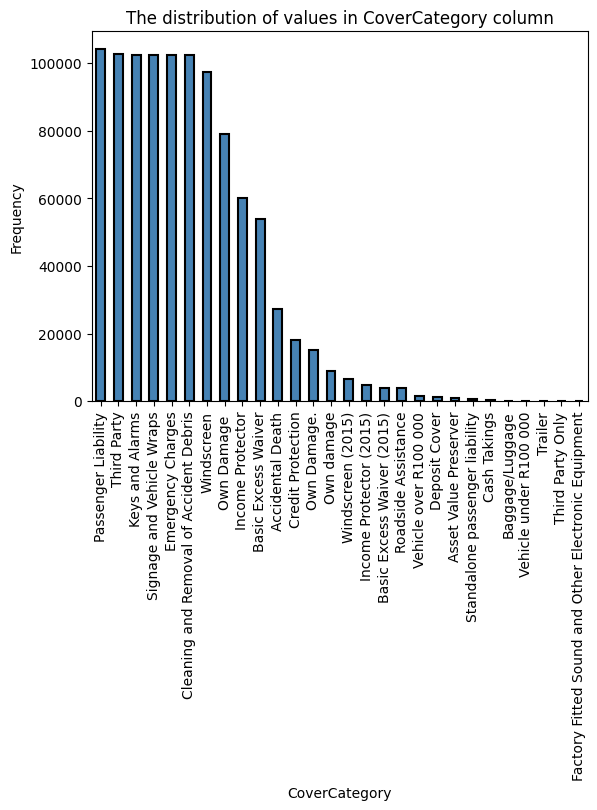

In [18]:
plot_data(df,column='CoverCategory')

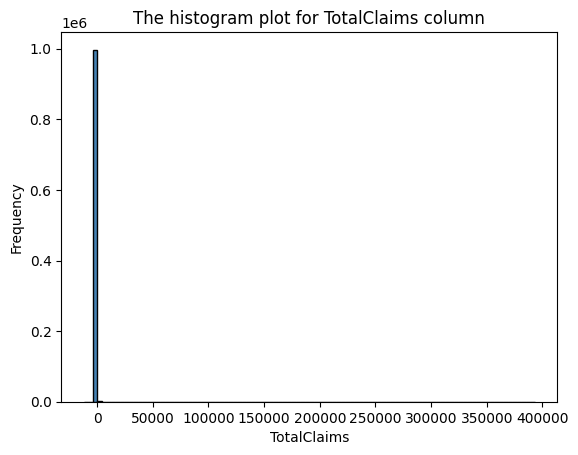

In [3]:
plot_data(df,column='TotalClaims')

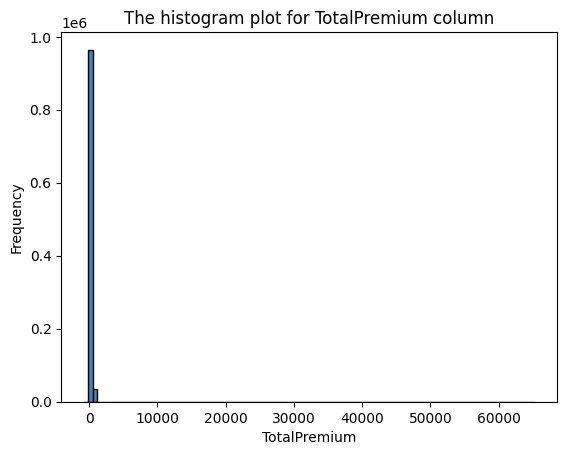

In [4]:
plot_data(df,column='TotalPremium')

* Like we said above, The data is concentrated around the values of 0 for both `TotalClaims` and `TotalPremium` columns. 

<Axes: >

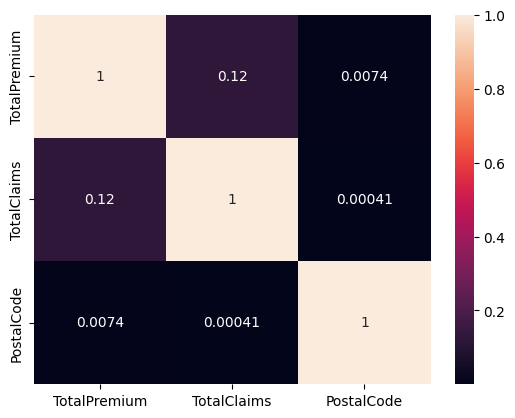

In [5]:

d=df[['PostalCode','TotalClaims','TotalPremium']].groupby('PostalCode').sum().reset_index()
plt.scatter(x=d['PostalCode'],y=d['TotalClaims'])
cor=df[['TotalPremium','TotalClaims','PostalCode']].corr()
sns.heatmap(cor,annot=True)


In [14]:
d=df.loc[df['TotalClaims']<0]


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
183527,15547,666,2014-07-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,-635.480000
230745,14758,679,2014-05-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,-256.350000
605407,48814,4361,2014-08-01 00:00:00,False,,Individual,Mr,English,Standard Bank,Current account,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,641.836053,-12002.412281
903685,50048,4598,2014-09-01 00:00:00,False,,Individual,Mrs,English,ABSA Bank,Savings account,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,570.573333,-5690.719298
915444,15618,669,2014-05-01 00:00:00,False,ZA,Individual,Mr,English,First National Bank,Savings account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,-72.000000


In [22]:
df['TotalPremium'].value_counts()

TotalPremium
0.000000      381634
21.929825      49731
74.561404      34382
78.947368      30400
43.859649      16919
               ...  
102.947953         1
7.970164           1
526.759355         1
458.051613         1
35.332316          1
Name: count, Length: 38959, dtype: int64